In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
# To read files within the folder
import glob
# To get filenames
import os
import matplotlib.gridspec as gridspec
import re

In [15]:
# Defining a class for the measurements
class Measurement:
   
   def __init__(self, tag, values, groupdata=None):
        self.tag = tag
        self.values = values
             
        # Analizing pattern in filename
        typedata = re.search('(.+?)MW', tag)
        if typedata:
            groupdata = typedata.group(1)
            groupdata = groupdata + 'MW'
        # Group of data (according voltage) 
        self.groupdata = groupdata

In [25]:
# Opening files
# *.CSV in the current directory (or specific path)
path = '*.CSV';
files = glob.glob(path);

In [26]:
# Collecting data from CSV files
cols = ['f','RE', 'ShotNoise', 'RLaser']
# "data" is a list of Measurements. Each element is a table 
# of values for the corresponding measurement
data = [];
for i, file in enumerate(files):
    run = Measurement(os.path.basename(file), 
                      pd.read_csv(file, sep=',', skiprows=range(0, 16), 
                                   header=None,names=cols))
    data.append(run)

In [27]:
# Defining array of plots
rows = 1
cols = 4
gs = gridspec.GridSpec(rows, cols, wspace=0.3, hspace=0.0)

# To plot every set of data
def data_graph(group):
    fig = plt.figure(figsize=(20,5))
    if group in ["1MW", "5MW", "10MW"]:
        # Collect all the measurements for the corresponding value asked
        run = []
        for elem in data:
            if group == elem.groupdata:
                run.append(elem)
    
    # Plotting along the elements of run
    for j in range(cols):
        ax = plt.subplot(gs[0, j])
        ax.plot(run[j].values.f, run[j].values.RE, label="R. Eletrônico")
        ax.plot(run[j].values.f, run[j].values.ShotNoise, label="Shot Noise")
        ax.plot(run[j].values.f, run[j].values.RLaser, label="R. Laser")
        ax.set_xlabel('Frequency (MHz)')
        ax.set_ylabel('Intensity (dBm)')
        
        
    # Put a legend to the right of the current axis
    plt.legend(loc='center', bbox_to_anchor=[-1.5, -0.2], fancybox=True, ncol=3) 
    plt.show()

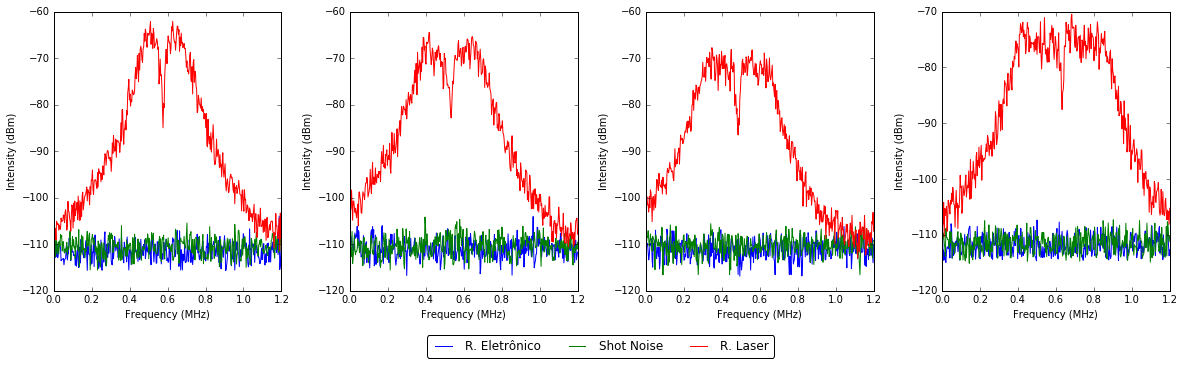

In [28]:
data_graph("1MW")

In [ ]:
# http://stackoverflow.com/questions/4666973/how-to-extract-a-substring-from-inside-a-string-in-python
# http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot